## Programming for Data Analysis - Project 2 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

### Data-cleansing ###

To begin, I will download the libraries I will use in this project. I will use pandas to create the dataframes which I will use to analyse the historical climate data:

In [286]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

I have downloaded multiple climate related datasets online. These datasets were as follows:

- Atmospheric **carbon dioxide** concentratons from a report by the Intergovernmental Panel on Climate Change (IPCC); most recent year in dataset is 2001.

- Atmospheric **carbon dioxide** concentrations from a 2008 paper in Nature by Luthi et al; most recent year in dataset is 1870 (137 years prior to 2007).

- Atmospheric **carbon dioxide** data from the Mauna Loa Observatory in Hawaii, providing annual data from 1959 to 2022, when precise measurements of atmospheric carbon dioxide first began to be taken. Previously, the analyser tool worked using infrared absorption, but since 2019 it has worked on the basis of a technique called 'Cavity Ring-Down Spectroscopy'. Measurements are assured to be reflective of the true composition of the global atmosophere, due to the location of the observatory and the rigour with which measurements are calibrated and independently verified.

- **Temperature** estimates going back over 820,000 years based on the EPICA Dome C Ice Core Deuterium Data. EPICA stands for European Project for Ice Coring in Antarctica. It estimates past temperature using deuterium as a proxy. Deuterium is a heavy form of hydrogen (containing a neutron in addition to the one proton found in "light" hydrogen). In colder periods, there tends to be less deuterium in ice cores than in warmer periods. The reason for this is that during warm periods, more of the lighter form of hydrogen is evaporated away from the surface of the ocean, so that when the moist air moves northwards to the poles, it contains a higher ratio of heavy hydrogen than it contains during cold periods; precipitation then contains more of this heavy hydrogen and this ultimately shows up in the ice cores. I will refer to this dataset as the "Jouzel" dataset for convenience (Jean Jouzel is a leading glaciologist and climatologist who is one of the creators of the dataset). I will use this dataset to calculate the Anarctic temperature anomaly for the period from 820,000 years ago to 1850 AD.

- Global **temperature anomaly** data from the National Oceanic and Atmospheric Administration (NOAA). Measurements for the anomaly are taken from 1850 to 2022 and are calculated against the average temperature for the period 1901 to 2000 and are measured in degrees celsius.

- Antarctic **temperature anomaly** data from the National Oceanic and Atmospheric Administration (NOAA). Measurements for the anomaly are taken from 1850 to 2022 and are calculated against the average temperature for the period 1910 to 2000 and are measured in degrees celsius.

- Atmospheric **methane** concentrations estimated from ice core data from Antarctica EPICA Dome C and Law Dome. This covers the period from 797446 years ago to the year 1980. The record until around 1004 AD relates entirely to Dome C; the record between around 1004 AD and 1824 AD relates to a combination of Dome C and Law Dome, while the record from 1824 onwards relates almost entirely to Law Dome. I cut the relevant data from a source csv file from the Environmental Protection Agency website and saved it into my working directory; I merged and manipulated the data further using python. Figures for methane are measured in parts per billion by volume.

- Recent global atmospheric **methane** concentrations obtained from the NOAA website. Atmospheric methane concentrations are determined from marine surface sites. This dataset covers the period 1984 to 2022.

With the exception of the Mauna Loa dataset, these datasets were not in csv format initially. To make it easier to create dataframes using pandas, I saved all my source files as csv files in my working directory. I will edit the dataframes using python before I analyse the data; this will include renaming column headings to make them easier to work with. I will also add extra columns to datasets to standardise the figures for time measurement and have the oldest years listed first, so my plots print from oldest years at the left to most recent years at the right.

Firstly, I will load up and amend the IPCC CO2 dataset:

In [287]:
df_co2_ipcc = pd.read_csv("CO2_ipcc_csv.csv")

# rename column names of existing dataframe (setting 'inplace' parameter equal to 'True')
df_co2_ipcc.rename(columns={'Gasage (yr BP) ': 'Year before 1950', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'sigma mean CO2'}, inplace=True) 

# here I am adding a new column called 'Years' to standardise the time measurements across different datasets.
# I am adding 73 years to every value in the 'years before 1950' column to effectively convert the column to 'years before 2023'. 
# I am then multiplying each year by minus 1, so that the column represents years "in the past"
df_co2_ipcc['Years'] = (df_co2_ipcc['Year before 1950'] + 73) * -1

# reversing the order of the dataset, to for the older years to appear on the left-hand side of the x-axis
df_co2_ipcc = df_co2_ipcc[::-1]

print(df_co2_ipcc)

      Year before 1950     CO2  sigma mean CO2      Years
1900         805668.87  207.29            2.20 -805741.87
1899         805132.44  202.23            0.69 -805205.44
1898         804522.67  204.86            1.64 -804595.67
1897         804009.87  207.50            0.92 -804082.87
1896         803925.28  202.92            2.06 -803998.28
...                ...     ...             ...        ...
4               -43.08  353.95            0.04     -29.92
3               -44.41  357.11            0.16     -28.59
2               -46.28  359.65            0.10     -26.72
1               -48.00  361.78            0.37     -25.00
0               -51.03  368.02            0.06     -21.97

[1901 rows x 4 columns]


Next, I will load up and amend the 2008 Nature paper dataset:

In [288]:
df_co2_nature = pd.read_csv("CO2_nature_csv.csv")

df_co2_nature.rename(columns={'EDC3_gas_a (yr)': 'Years ago', 'CO2 (ppmv)': 'CO2'}, inplace=True)

# Since the paper was written in 2007 and the most recent year in the associated dataset is 137 year prior, I have added 16
# years to the figure for "years ago" when creating the new column 'Years'
df_co2_nature['Years'] = (df_co2_nature['Years ago'] + 16) * -1

df_co2_nature = df_co2_nature[::-1]

print(df_co2_nature)

      Years ago    CO2   Years
1095     798512  191.0 -798528
1094     797099  188.4 -797115
1093     796467  189.3 -796483
1092     795202  195.2 -795218
1091     794608  199.4 -794624
...         ...    ...     ...
4           404  281.9    -420
3           395  279.1    -411
2           279  277.9    -295
1           268  274.9    -284
0           137  280.4    -153

[1096 rows x 3 columns]


Next I will load up the relatively small dataset from Mauna Loa, containing data for atmospheric CO2 levels:

In [289]:
df_mauna_loa_csv = pd.read_csv("mauna_loa_csv.csv")

# I will rename the columns to standardise the heading for the CO2 data:
df_mauna_loa_csv.rename(columns={'year': 'year', 'mean': 'CO2', 'unc':'unc'}, inplace=True)

# I will create a new column called 'Years', to standardise the measurement of time across the datasets.
# I don't need to reverse the rows in this dataset since the earliest year is already in the first row.
df_mauna_loa_csv['Years'] = (2023 - df_mauna_loa_csv['year']) * -1

print(df_mauna_loa_csv)

    year     CO2   unc  Years
0   1959  315.98  0.12    -64
1   1960  316.91  0.12    -63
2   1961  317.64  0.12    -62
3   1962  318.45  0.12    -61
4   1963  318.99  0.12    -60
..   ...     ...   ...    ...
59  2018  408.72  0.12     -5
60  2019  411.65  0.12     -4
61  2020  414.21  0.12     -3
62  2021  416.41  0.12     -2
63  2022  418.53  0.12     -1

[64 rows x 4 columns]


Next, the "Jouzel" temperature data inferred from deuterium levels in ice cores from EPICA Dome C:

In [290]:
df_temp_jouzel_csv = pd.read_csv("temp_jouzel_csv.csv")

df_temp_jouzel_csv.rename(columns={'bag': 'bag', 'ztop': 'depth', 'EDC3béta': 'Years before 1950', 'AICC2012': 'year_new', 'deutfinal': 'deuterium', 'temp': 'temp_Kelvin', 'acc-EDC3beta' : 'acc-EDC3beta'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. -55 relates to (-55 + 73 = 18 years ago, or the year 2005)
# The negative figure allows for my graph to print from oldest date to most recent
df_temp_jouzel_csv['Years'] = (df_temp_jouzel_csv['year_new'] + 73) * -1

# adding a new column called 'temp_Celsius' as I am more familiar with this unit of measurement for temperature and would
# like to plot the data in terms of Celsius 
df_temp_jouzel_csv['temp_Celsius'] = (df_temp_jouzel_csv['temp_Kelvin'] - 273.15)

df_temp_jouzel_csv = df_temp_jouzel_csv[::-1]

print(df_temp_jouzel_csv)

       bag    depth  Years before 1950       year_new  deuterium  temp_Kelvin  \
5818  5819  3199.90       820093.90000  821838.000000     -430.0        211.4   
5817  5818  3199.35       819303.10000  820769.000000     -429.8        211.4   
5816  5817  3198.80       818505.50000  819700.000000     -430.3        211.3   
5815  5816  3198.25       817693.60000  818631.000000     -431.4        211.2   
5814  5815  3197.70       816871.60000  817562.000000     -432.2        211.0   
...    ...      ...                ...            ...        ...          ...   
4        5     2.20          -24.55278     -34.516667        NaN        218.3   
3        4     1.65          -31.64156     -41.540000        NaN        218.3   
2        3     1.10          -37.44019     -46.026667        NaN        218.3   
1        2     0.55          -43.55977     -50.513333        NaN        218.3   
0        1     0.00          -50.00000     -55.000000        NaN        218.3   

      acc-EDC3beta         

I will now load up the dataset for the Antarctic temperature anomaly and create new column which standardises the data for the year to allow for easier comparison with other datasets:

In [291]:
df_antarctic_temp_anomaly_1850 = pd.read_csv("antarctic_temp_anomaly_csv.csv")

# renaming columns to standardise across datasets when combining later on
df_antarctic_temp_anomaly_1850.rename(columns={'Year': 'year', 'Anomaly': 'anomaly'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. - 1 is 1 year ago ie. 2022
df_antarctic_temp_anomaly_1850['Years'] = (df_antarctic_temp_anomaly_1850['year'] - 2023)

print(df_antarctic_temp_anomaly_1850)


     year  anomaly  Years
0    1850    -0.08   -173
1    1851    -0.10   -172
2    1852    -0.05   -171
3    1853    -0.08   -170
4    1854    -0.08   -169
..    ...      ...    ...
168  2018     0.41     -5
169  2019     0.34     -4
170  2020     0.35     -3
171  2021     0.00     -2
172  2022     0.38     -1

[173 rows x 3 columns]


I will also upload the data for Global temperature anomoly from 1850 to 2022, and add a column for 'years ago' as I did for the antarctic temperature anomaly data:

In [292]:
df_global_temp_anomaly_1850 = pd.read_csv("global_temp_anomaly_csv.csv")

# renaming columns to standardise across datasets when combining later on
df_global_temp_anomaly_1850.rename(columns={'Year': 'year', 'Anomaly': 'anomaly'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. - 1 is 1 year ago ie. 2022
df_global_temp_anomaly_1850['Years'] = (df_global_temp_anomaly_1850['year'] - 2023)

print(df_global_temp_anomaly_1850)

     year  anomaly  Years
0    1850    -0.16   -173
1    1851    -0.08   -172
2    1852    -0.09   -171
3    1853    -0.10   -170
4    1854    -0.10   -169
..    ...      ...    ...
168  2018     0.86     -5
169  2019     0.98     -4
170  2020     1.01     -3
171  2021     0.86     -2
172  2022     0.91     -1

[173 rows x 3 columns]


I will now create dataframes for the data relating to methane and modify them where necessary. Firstly, the paleo data:

In [293]:
df_ch4_paleo = pd.read_csv("ch4_paleo_csv.csv")

# Here I am adding a new column called 'Years' to standardise the time measurements across different datasets.
# The original dataset split the years by AD/BC so I subtracted 2023 from each year to standardise the measurement of time.
df_ch4_paleo['Years'] = (df_ch4_paleo['year'] - 2023)

# I am converting the figures in the 'CH4' column to float to override ensure the code compiles properly later on, since
# the source data file includes commas in the numerical data and pandas otherwise interprets the data as a string
df_ch4_paleo['Years'] = df_ch4_paleo['Years'].astype(float)

# Here I am merging two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column. 
# This is to create just one column of paleohistorical data for atmospheric methane concentration.
df_ch4_paleo['CH4'] = df_ch4_paleo['dome_c'].combine_first(df_ch4_paleo['law_dome'])

# Next I am dropping the unwanted columns 'dome_c', 'law_dome' and 'year'. This gives us
# a dataframe containing only years and atmospheric CH4 concentrations up until 1980.
# The axis = 1 parameter is used to specify that it is a column being dropped as opposed to a row
df_ch4_paleo = df_ch4_paleo.drop(['dome_c', 'law_dome', 'year'], axis = 1)

print(df_ch4_paleo)

         Years     CH4
0    -799469.1   399.3
1    -798490.4   457.8
2    -797350.0   396.1
3    -796392.7   418.0
4    -795011.0   428.3
...        ...     ...
2170     -50.0  1385.8
2171     -49.0  1421.5
2172     -48.0  1420.4
2173     -46.0  1458.1
2174     -43.0  1479.5

[2175 rows x 2 columns]


Secondly, the more recent methane data:

In [294]:
df_ch4_recent = pd.read_csv("ch4_recent_csv.csv")

# Here I am adding a new column called 'Years' to standardise the time measurements across different datasets.
# The original dataset split the years by AD/BC so I subtracted 2023 from each year to standardise the measurement of time.
df_ch4_recent['Years'] = (df_ch4_recent['year'] - 2023)

# I am converting the figures in the 'Years' columns to float to avoid getting a warning message later when I try to 
# combine the 'Years' data from the recent data (which is in integer format) with the 'Years' data from the 
# paleo dataset, which is in float format
df_ch4_recent['Years'] = df_ch4_recent['Years'].astype(float)

# Next I am dropping the unwanted column 'year'. This gives us a dataframe containing only years 
# and atmospheric CH4 concentrations from 1984 to 2022.
# The axis = 1 parameter is used to specify that it is a column being dropped as opposed to a row
df_ch4_recent = df_ch4_recent.drop(['year'], axis = 1)

print(df_ch4_recent)

        CH4  Years
0   1644.85  -39.0
1   1657.29  -38.0
2   1670.09  -37.0
3   1682.70  -36.0
4   1693.28  -35.0
5   1704.53  -34.0
6   1714.43  -33.0
7   1724.78  -32.0
8   1735.47  -31.0
9   1736.53  -30.0
10  1742.07  -29.0
11  1748.88  -28.0
12  1751.28  -27.0
13  1754.48  -26.0
14  1765.54  -25.0
15  1772.33  -24.0
16  1773.22  -23.0
17  1771.22  -22.0
18  1772.66  -21.0
19  1777.33  -20.0
20  1777.05  -19.0
21  1774.16  -18.0
22  1774.94  -17.0
23  1781.38  -16.0
24  1787.01  -15.0
25  1793.52  -14.0
26  1798.91  -13.0
27  1803.14  -12.0
28  1808.12  -11.0
29  1813.43  -10.0
30  1822.53   -9.0
31  1834.26   -8.0
32  1843.12   -7.0
33  1849.58   -6.0
34  1857.33   -5.0
35  1866.58   -4.0
36  1878.93   -3.0
37  1895.28   -2.0
38  1911.83   -1.0


Finally, we can merge the paleo and recent methane datasets to enable us to plot it later on:

In [295]:
df_ch4 = pd.merge(df_ch4_paleo, df_ch4_recent, on = 'Years', how = 'outer')

# The merge produces two columns: 'CH4_x' relating to the paleo data and 'CH4_y' relating to the recent data.
# Here I am merging these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_ch4['CH4'] = df_ch4['CH4_x'].combine_first(df_ch4['CH4_y'])

# Here I am dropping the unwanted columns CH4_x and CH4_y. 
# The axis = 1 parameter is used to specify that it is a column being dropped as opposed to a row
df_ch4 = df_ch4.drop(['CH4_x', 'CH4_y'], axis = 1)

print(df_ch4)

         Years      CH4
0    -799469.1   399.30
1    -798490.4   457.80
2    -797350.0   396.10
3    -796392.7   418.00
4    -795011.0   428.30
...        ...      ...
2209      -5.0  1857.33
2210      -4.0  1866.58
2211      -3.0  1878.93
2212      -2.0  1895.28
2213      -1.0  1911.83

[2214 rows x 2 columns]


#### Plots of datasets ####

Below are plots of the CO2 and temperature datasets which I wanted to plot to familiarise myself with them. I have included grids on plots where I felt they would enhance their readibility:

*IPCC data:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years up to 2001 AD - IPCC data'}, xlabel='Years', ylabel='CO2'>

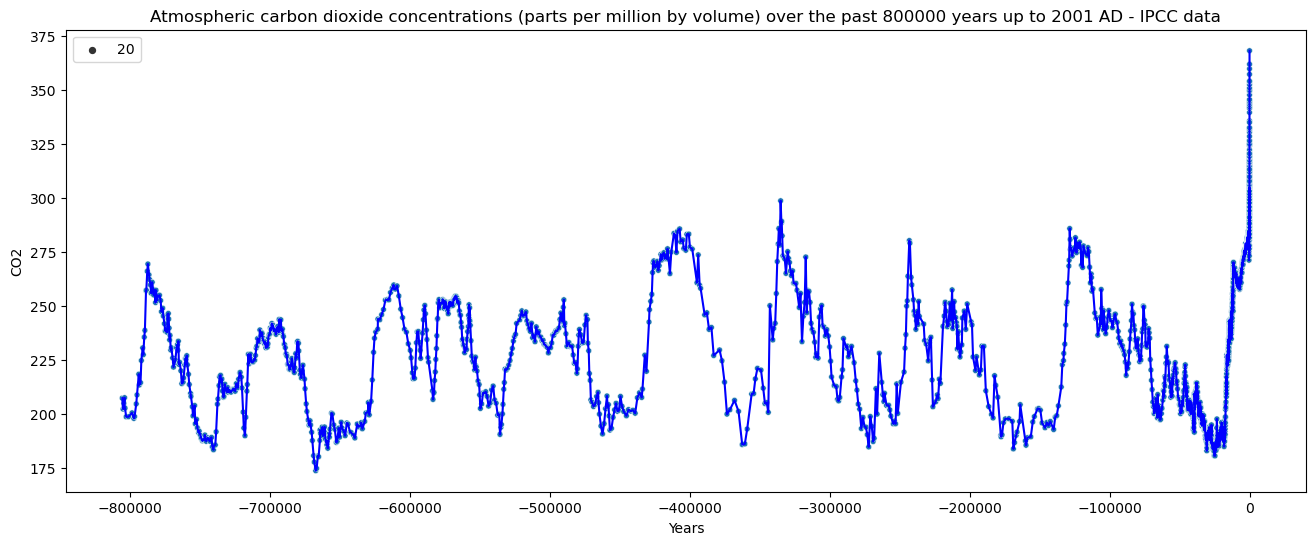

In [296]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years up to 2001 AD - IPCC data')

sns.scatterplot(x ='Years', y = 'CO2', data = df_co2_ipcc, size = 20)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x ='Years', y = 'CO2', data = df_co2_ipcc, color = 'blue')

*Nature data:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years up to 1870 AD - Nature data'}, xlabel='Years', ylabel='CO2'>

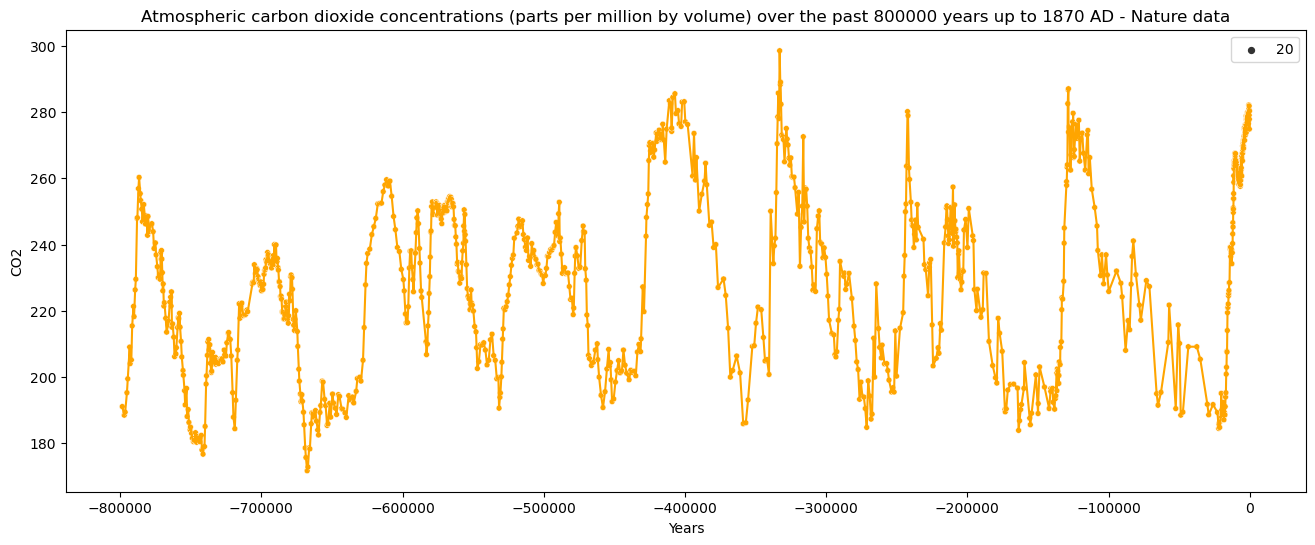

In [297]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years up to 1870 AD - Nature data')

sns.scatterplot(x='Years', y='CO2', data=df_co2_nature, color = 'orange', size = 20)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years', y = 'CO2', data = df_co2_nature, color = 'orange')


*Mauna Loa:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) since 1959 - Mauna Loa data'}, xlabel='year', ylabel='CO2'>

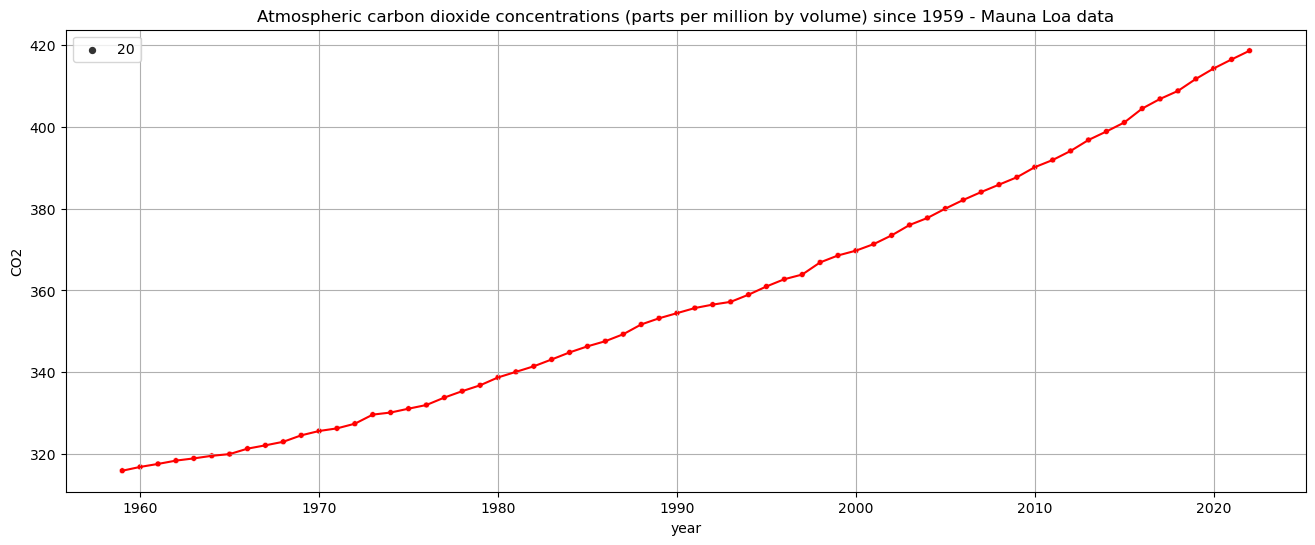

In [298]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) since 1959 - Mauna Loa data')
plt.grid()

# Here I will plot using the column 'year' as opposed to 'Years', as the graph for recent data is easier to comprehend 
# when the x-axis is labelled by calendar year rather than how many years ago the year was
# We use the 'size' parameter to decrease size of markers 
sns.scatterplot(x = 'year', y = 'CO2', data=df_mauna_loa_csv, color = 'red', size = 20)      

sns.lineplot(x = 'year', y = 'CO2', data = df_mauna_loa_csv, color = 'red')

*Jouzel data:*

<Axes: title={'center': 'Antarctic air temperature estimates in degrees Celsius for past 820000 years inferred from deuterium measurements in EPICA Dome C ice cores'}, xlabel='Years', ylabel='Temperature (°C)'>

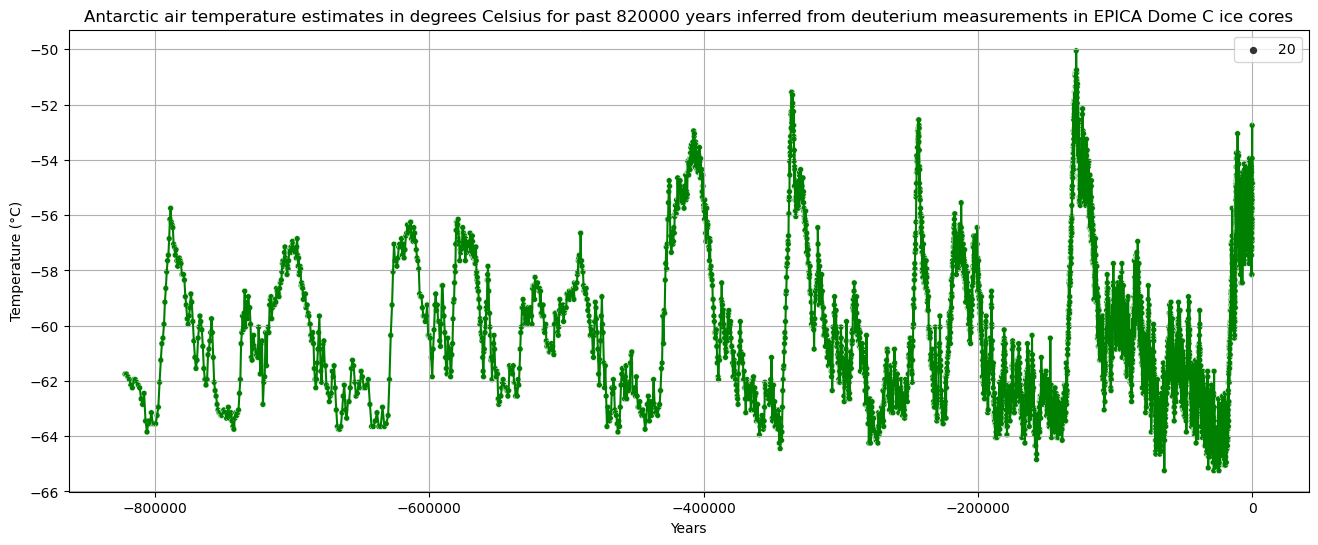

In [299]:
plt.figure(figsize= (16,6))
plt.title('Antarctic air temperature estimates in degrees Celsius for past 820000 years inferred from deuterium measurements in EPICA Dome C ice cores')
plt.xlabel('Years')
plt.ylabel('Temperature (°C)')
plt.grid(True)   

sns.scatterplot(x = 'Years', y = 'temp_Celsius', data=df_temp_jouzel_csv, color = 'green', size = 20)      

sns.lineplot(x = 'Years', y = 'temp_Celsius', data = df_temp_jouzel_csv, color = 'green')

*Antarctic temperature anomaly 1850 to 2022:*

<Axes: title={'center': 'Antarctic temperature anomaly in degrees for the period 1850 to 2022'}, xlabel='year', ylabel='anomaly'>

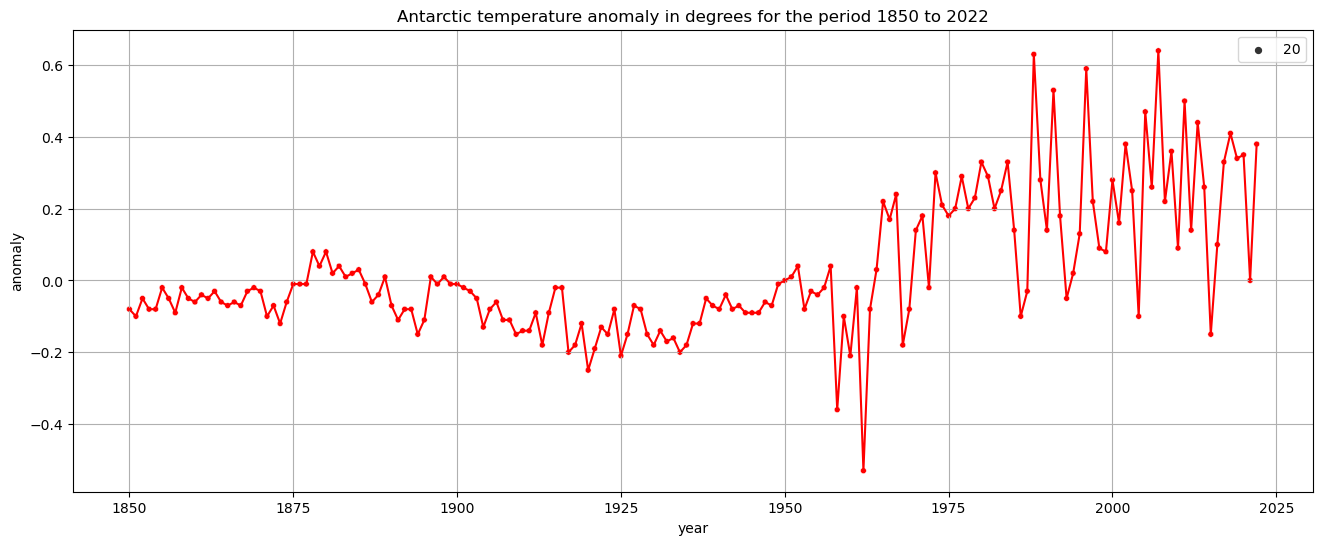

In [300]:
plt.figure(figsize= (16,6))
plt.title('Antarctic temperature anomaly in degrees for the period 1850 to 2022')
plt.grid(True)

# Here I will plot using the column 'year' as opposed to 'Years', as the graph for recent data is easier to comprehend 
# when the x-axis is labelled by calendar year rather than how many years ago the year was
# We use the 'size' parameter to decrease size of markers 
sns.scatterplot(x = 'year', y = 'anomaly', data=df_antarctic_temp_anomaly_1850, color = 'red', size = 20)      

sns.lineplot(x = 'year', y = 'anomaly', data = df_antarctic_temp_anomaly_1850, color = 'red')


#### Comparison of C02 datasets ####

To get a sense of the extent to which carbon dioxide levels may have increased in recent years compared to the long-term historical trends, I would ideally have a dataset which contains carbon-dioxide data from the distant past right up to the present day. 

Fortunately, I can obtain this by combining the data from the IPCC dataset with the more recent data from the Mauna Loa dataset. 

Firstly, I want give myself some confidence that the long-term historical data in the IPCC dataset is valid; to do this, I will compare it with the 2008 Nature dataset by creating plot a lineplot for each dataset on the same graph:

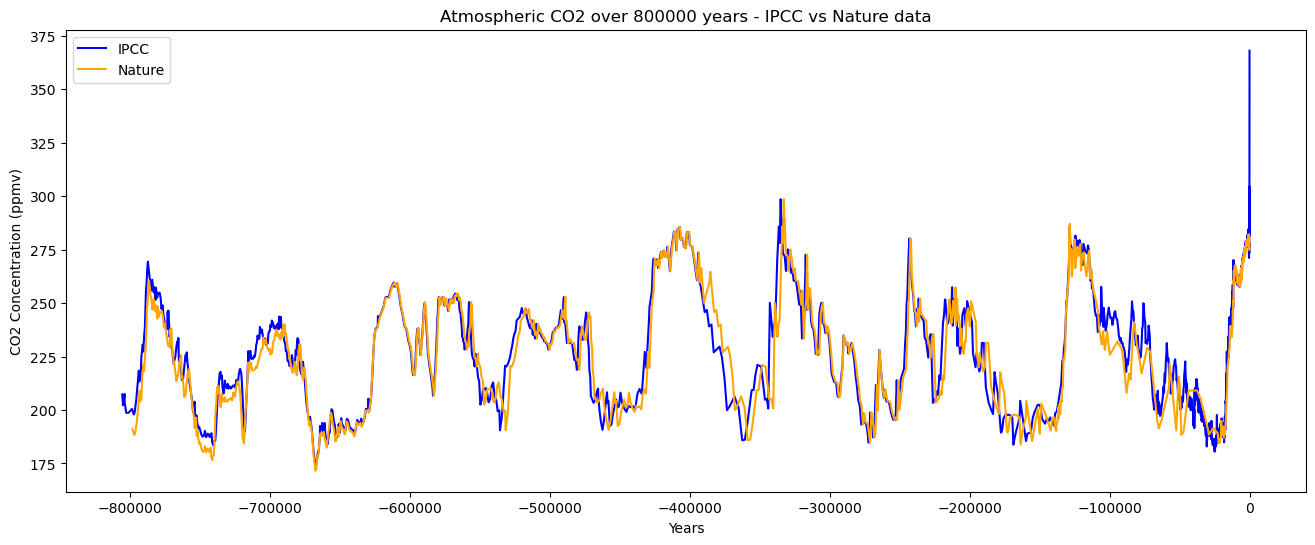

<Figure size 640x480 with 0 Axes>

In [301]:
plt.figure(figsize= (16,6))

sns.lineplot(x='Years', y='CO2', data=df_co2_ipcc, color = 'blue', label='IPCC')
sns.lineplot(x='Years', y='CO2', data=df_co2_nature, color = 'orange', label='Nature')

plt.title('Atmospheric CO2 over 800000 years - IPCC vs Nature data')
plt.xlabel('Years')
plt.ylabel('CO2 Concentration (ppmv)')

plt.legend()

plt.show()

plt.savefig('C02_IPCC_vs_Nature.png')

We see that the datasets are largely in agreement with one another. The Nature data ends in 1870, while the IPCC data continues on to 2001, and the large spike in carbon dioxide levels seen on the right hand-side of the graph relates to these additional years present in the IPCC data.

We can also plot the most recent carbon dioxide data from the IPCC dataset with it's counterpart data from the Mauna Loa dataset:

In [302]:
# create a new sub-dataframe from the IPCC dataframe containing only rows relating to 1959 onwards 
#(ie. up to last data point of 2001)
df_co2_ipcc_1959_to_2001 = df_co2_ipcc.loc[df_co2_ipcc['Years'] >= -64]

# create a new sub-dataframe from the IPCC dataframe containing only rows relating to 2001 backwards 
# (ie. back to first data point of 1959)
df_mauna_loa_1959_to_2001 = df_mauna_loa_csv.loc[df_mauna_loa_csv['Years'] <= -22]

#print(df_co2_ipcc_1959_to_2001)

#print(df_mauna_loa_1959_to_2001)

Now we can plot the data from these two sub-dataframes against each other:

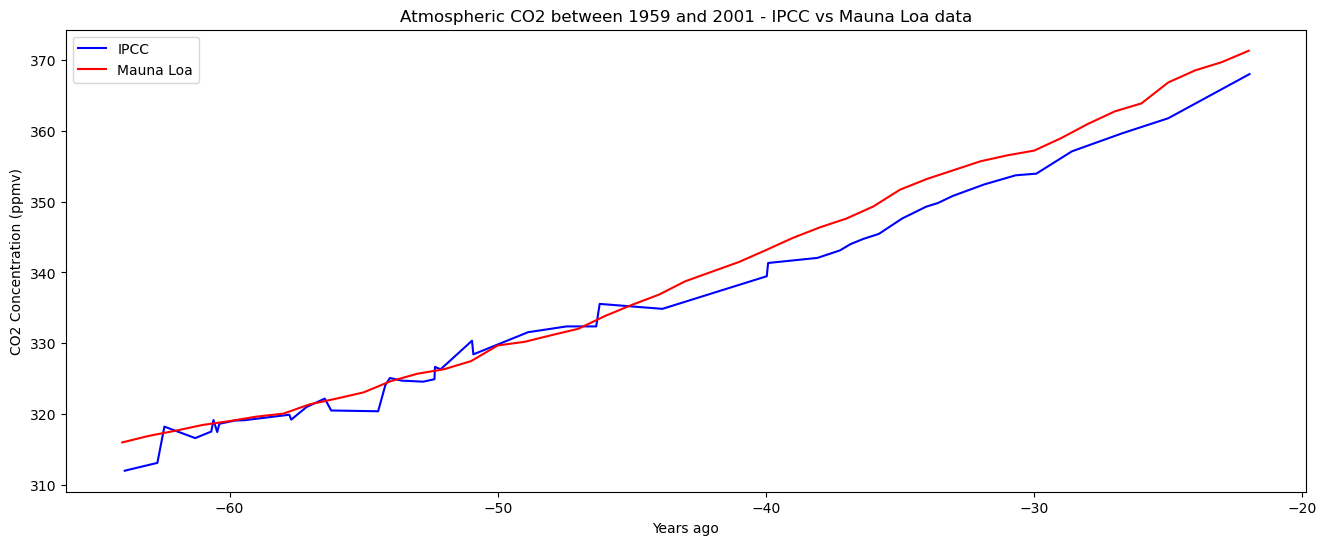

<Figure size 640x480 with 0 Axes>

In [303]:
plt.figure(figsize= (16,6))

sns.lineplot(x='Years', y='CO2', data=df_co2_ipcc_1959_to_2001, color = 'blue', label='IPCC')
sns.lineplot(x='Years', y='CO2', data=df_mauna_loa_1959_to_2001, color = 'red', label='Mauna Loa')

plt.title('Atmospheric CO2 between 1959 and 2001 - IPCC vs Mauna Loa data')
plt.xlabel('Years ago')
plt.ylabel('CO2 Concentration (ppmv)')

plt.legend()

plt.show()

plt.savefig('co2_ipcc_vs_mauna_loa.png')

It should be noted that the IPCC data relates to CO2 levels inferred from high resolution ice cores in the Law Dome in East Antarctica while the Mauna Loa data comes from the summit of Mauna Loa in Hawaii, using a sophisticated analyser tool. Nevertheless, we can see that the data for CO2 concentration during the overlapping period of the IPCC and Mauna Loa datasets is in agreement.

#### Combining IPCC and Mauna Loa Carbon Dioxide datasets ####

I will now combine the IPCC data with the Mauna Loa data to create a new dataframe containing data for carbon dioxide levels from 805,741 years ago to today:

In [304]:
# First I will create a sub-dataframe from the Mauna Loa containing CO2 data relating to 2002 onwards
df_post_2001_mauna_loa = df_mauna_loa_csv.loc[df_mauna_loa_csv['Years'] >= -21 ]

# creating a new dataframe from the Mauna Loa data, containing only the two columns of interest 'CO2' and 'Years'.
# To avoid getting a warning for 'chained indexing', I followed the syntax as found in this link : 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df_post_2001_mauna_loa_trimmed = df_post_2001_mauna_loa.loc[:, ('Years', 'CO2')]

# I am converting the figures in the years columns to float to avoid getting a warning message when I combine the 'Years' data
# from the Mauna Loa data (which is in integer format) with the 'Years' data from the IPCC dataset, which is in float format
df_post_2001_mauna_loa_trimmed['Years'] = df_post_2001_mauna_loa_trimmed['Years'].astype(float)

#print(df_post_2001_mauna_loa_trimmed)

# creating a new dataframe from the IPCC data, containing only the two columns of interest 'CO2' and 'Years'
df_co2_ipcc_trimmed = df_co2_ipcc.loc[:, ('Years', 'CO2')]

#print(df_co2_ipcc_trimmed)

# Here I am merging the trimmed dataframes for the IPCC data and post-2001 Mauna Loa data 
df_co2 = pd.merge(df_co2_ipcc_trimmed, df_post_2001_mauna_loa_trimmed, on = 'Years', how = 'outer')

# The merge produces two columns: 'C02_x' relating to the IPCC data and 'CO2_y' relating to the Manua Loa data.
# Here I am merging these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_co2['CO2'] = df_co2['CO2_x'].combine_first(df_co2['CO2_y'])

# Here I am dropping the unwanted columns CO2_x and CO2_y. the axis = 1 parameter is used to specify that it is a column being
# dropped as opposed to a row
df_co2 = df_co2.drop(['CO2_x', 'CO2_y'], axis = 1)

print(df_co2)

          Years     CO2
0    -805741.87  207.29
1    -805205.44  202.23
2    -804595.67  204.86
3    -804082.87  207.50
4    -803998.28  202.92
...         ...     ...
1917      -5.00  408.72
1918      -4.00  411.65
1919      -3.00  414.21
1920      -2.00  416.41
1921      -1.00  418.53

[1922 rows x 2 columns]


Next, I will plot this composite carbon dioxide dataset to show how the most recent figures for carbon dioxide levels compare with the long-term historical average:

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Years', ylabel='CO2'>

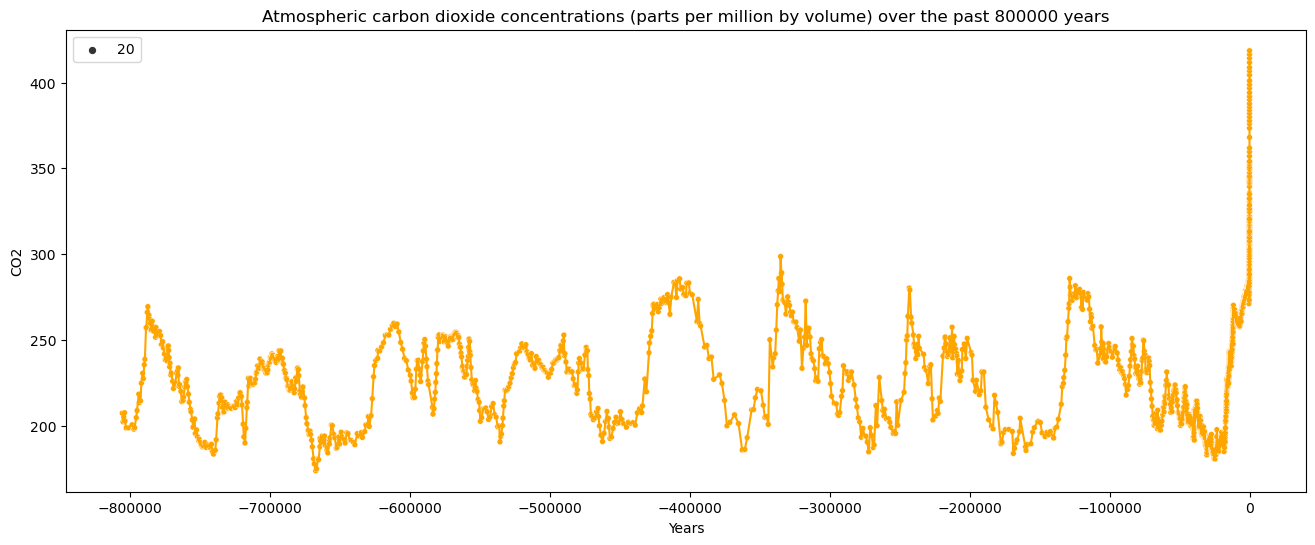

In [305]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x ='Years', y ='CO2', data=df_co2, color ='orange', size = 20)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years', y = 'CO2', data = df_co2, color = 'orange')

We can see clearly that atmospheric carbon dioxide levels have risen greatly in a very short period of time to reach levels significantly higher than the levels which prevailed for the past 800000 years.

### CO2 versus Temperature Anomoly ###

To compare CO2 levels for the past 820000 years with the temperature anomaly, I will need to obtain a dataset for the temperature anomaly covering this whole timespan. We can use data from the NOAA for the Antarctic air temperature anomaly for the period from 1850 to now. This record compares the temperature for each year to the average temperature of the base period 1910 to 2000. 

For earlier data, I will calculate the temperature anomaly as follows:
I will take the average temperature for the period 1000 AD to 1845 AD from the Jouzel dataset, calculated based on the number of data points for temperature during this timespan; I am choosing 1845 AD since this is the most recent figure for temperature given in the Jouzel dataset which doesn't have a counterpart datapoint in the NOAA dataset. The reason I am using almost 845 years of data as a base period is that a similar base period (the last 1000 years) was used to calculate the temperature anomaly in the earlier Jouzel dataset (found on the text file here: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt). I wasn't able to easily extract this temperature anomaly data from the text file so I decided to calculate it myself based on the newer dataset (saved in my working directory as a csv file).

Since 1845 is a relatively early date in terms of humanity's impact on the atmosphere due to economic activity, it seems acceptable to me to compare the temperature in 1845 to the pre-industrial temperatures of earlier times. 

I will then create a dataframe containing the temperature anomaly going back to 820000 years ago, up to the present day. I will plot these figures against the figures for CO2 obtained above.

In [306]:
# First I will create a sub-dataframe from the Jouzel dataset containing temperature data relating to 1845 backwards
df_pre_1845_jouzel = df_temp_jouzel_csv.loc[df_temp_jouzel_csv['Years'] <= -178 ]

# Creating a new dataframe from the Jouzel sub-dataframe, containing only the two columns of interest 'Years' and 'temp_Kelvin'
# To avoid getting a warning for 'chained indexing', I followed the syntax as found in this link : 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df_pre_1845_jouzel_trimmed = df_pre_1845_jouzel.loc[:, ('Years', 'temp_Kelvin')]

# I am converting the figures in the years columns to float to avoid getting a warning messages if I try to combine 
# floats and integers when combining 'years' data from different datasets
df_pre_1845_jouzel_trimmed['Years'] = df_pre_1845_jouzel_trimmed['Years'].astype(float)

# to calculate the average temperature between 1000 AD and 1845 AD, we only take rows relating to 1013 years ago and onwards
df_1000_to_1845_jouzel = df_pre_1845_jouzel_trimmed.loc[df_pre_1845_jouzel_trimmed['Years'] >= - 1012]

mean_temp_1000_to_1845 = df_1000_to_1845_jouzel['temp_Kelvin'].mean()
round_mean_temp_1000_to_1845 = round(mean_temp_1000_to_1845, 2)
print(f"The mean Antarctic air temperature between 1000 AD and 1845 AD is estimated to be {round_mean_temp_1000_to_1845} Kelvin \n")

# Next I want to calculate the temperature anomaly for each year in the Jouzel dataset using this base period temperature of 217.18 kelvin:
df_pre_1845_jouzel_trimmed['anomaly'] = df_pre_1845_jouzel_trimmed['temp_Kelvin'] - 217.18
print("The temperature anomaly in degrees compared with the average for the period 1000 to 1845 is as follows: \n ")
print(df_pre_1845_jouzel_trimmed)

# Next I want to combine this pre 1845 temperature anomaly data with the post 1850 data from the NOAA:
# Firstly I will ensure the data for 'Years' in the NOAA daaset is in float format, to avoid getting a warning
# for trying to merge floats and ints in the same column
df_antarctic_temp_anomaly_1850['Years'] = df_antarctic_temp_anomaly_1850['Years'].astype(float)

df_temp_anomaly = pd.merge(df_pre_1845_jouzel_trimmed, df_antarctic_temp_anomaly_1850, on = 'Years', how = 'outer')

# The merge produces two anomaly columns: 'anomaly_x' relating to the Jouzel data and 'anomaly_y' relating to the NOAA data.
# Below I am merging these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_temp_anomaly['anomaly'] = df_temp_anomaly['anomaly_x'].combine_first(df_temp_anomaly['anomaly_y'])

# Next I am dropping the unwanted columns 'anomaly_x', 'anomaly_y', 'year' and 'temp_Kelvin'. This gives us
# a dataframe containing only years and the temperature anomly for each year in degrees (Celsius or Kelvin).
# The axis = 1 parameter is used to specify that it is a column being dropped as opposed to a row
df_temp_anomaly = df_temp_anomaly.drop(['anomaly_x', 'anomaly_y', 'year', 'temp_Kelvin'], axis = 1)
                                    
print(df_temp_anomaly)

The mean Antarctic air temperature between 1000 AD and 1845 AD is estimated to be 217.16 Kelvin 

The temperature anomaly in degrees compared with the average for the period 1000 to 1845 is as follows: 
 
              Years  temp_Kelvin  anomaly
5818 -821911.000000        211.4    -5.78
5817 -820842.000000        211.4    -5.78
5816 -819773.000000        211.3    -5.88
5815 -818704.000000        211.2    -5.98
5814 -817635.000000        211.0    -6.18
...             ...          ...      ...
25      -228.443333        218.4     1.22
24      -218.000000        217.0    -0.18
23      -207.836667        217.8     0.62
22      -197.673333        216.3    -0.88
21      -187.510000        216.8    -0.38

[5798 rows x 3 columns]
         Years  anomaly
0    -821911.0    -5.78
1    -820842.0    -5.78
2    -819773.0    -5.88
3    -818704.0    -5.98
4    -817635.0    -6.18
...        ...      ...
5966      -5.0     0.41
5967      -4.0     0.34
5968      -3.0     0.35
5969      -2.0     0.00
59

#### CO2 versus temperature anomaly ####

We can now plot the composite dataset for CO2 levels against the composite dataset for the temperature anomoly, over approximately 820000 years:

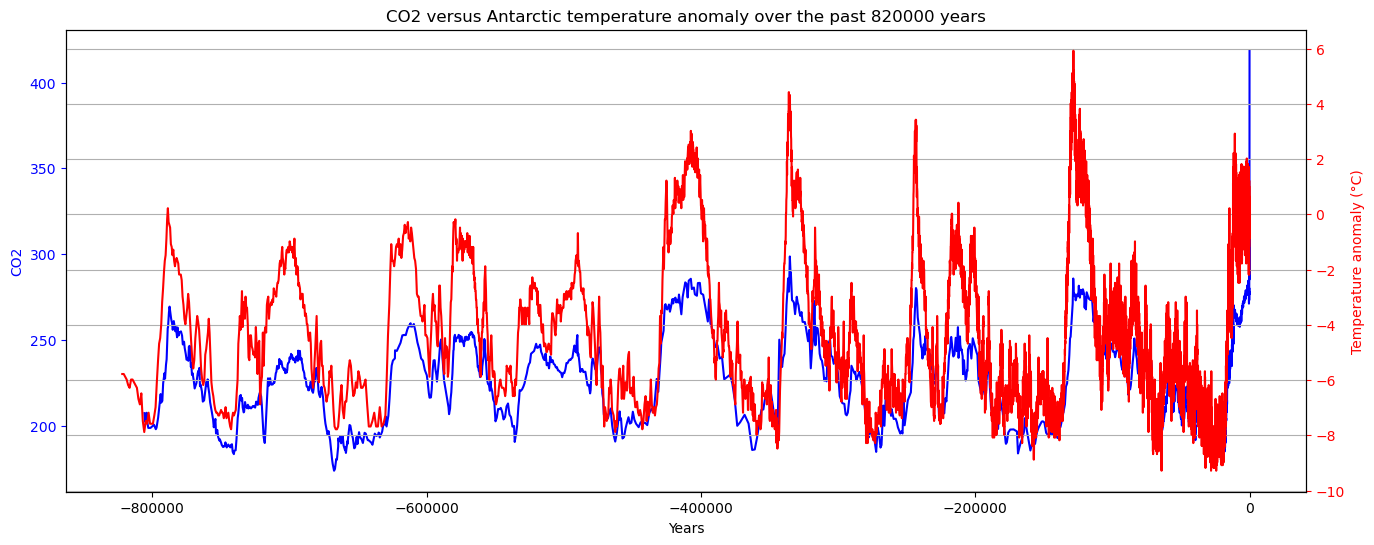

In [307]:
# This creates a plot capable of displaying more than one subplot
# https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin.
# Below is an alteration of some code I used in Project 1 for the Programming for Data Analysis module of my HDip in
# Data Analytics https://github.com/jmce22/pfda_project1 
# In that project I created a graph with two y-axes but with each y-axis' data measured against the same x-axis

fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CO2 on the primary y-axis
ax1.plot(df_co2['Years'], df_co2['CO2'], color='blue', label='CO2')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature on secondary y-axis
ax2.plot(df_temp_anomaly['Years'], df_temp_anomaly['anomaly'], color='red', label='Temperature anomaly')
ax2.set_ylabel('Temperature anomaly (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('CO2 versus Antarctic temperature anomaly over the past 820000 years') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CO2_vs_temp_anomaly')
plt.show()

It seems to be the case that over the past 820000 years, the temperature anomoly was associated with the level of CO2 in the atmosphere, as local peaks in the data for CO2 tend to occur during the same periods as local peaks in the air temperature data. 

We can also see that for most of the past 820000 years, the average temperature at Antarctica was colder than it is at present; this is to be expected, since for most of that period the earth was in a glacial period, with relatively warm interglacial periods like the past 12000 years being the exception.

To compare the data for the Antarctic temperature anomaly from 1850 with the figures for CO2 from 1850, I can create a sub-dataframe for the CO2 for 1850 to 2022 and plot it in the same way I plotted the full datasets; by doing this, we can investigate the temperature anomoly as it relates to recent increases in CO2 levels in the atmosphere. It should be borne in mind that the figures for temperature anomoly for 1850 onwards are calculated based on a the average Antarctic air temperature for the period 1910 to 2000.


In [308]:
df_co2_post_1850 = df_co2.loc[df_co2['Years'] > -174]
print(df_co2_post_1850)

# I will also create a sub-frame from the composite temperature anomaly dataset to include only years from 1850 onwards,
# as I want to use the 'Years' column which has a standardised format for measuring time
df_temp_anomaly_post_1850 = df_temp_anomaly.loc[df_temp_anomaly['Years'] >= -173]
print(df_temp_anomaly_post_1850)

       Years     CO2
1746 -172.74  284.00
1747 -172.17  288.79
1748 -171.89  285.47
1749 -169.29  288.05
1750 -168.28  285.57
...      ...     ...
1917   -5.00  408.72
1918   -4.00  411.65
1919   -3.00  414.21
1920   -2.00  416.41
1921   -1.00  418.53

[176 rows x 2 columns]
      Years  anomaly
5798 -173.0    -0.08
5799 -172.0    -0.10
5800 -171.0    -0.05
5801 -170.0    -0.08
5802 -169.0    -0.08
...     ...      ...
5966   -5.0     0.41
5967   -4.0     0.34
5968   -3.0     0.35
5969   -2.0     0.00
5970   -1.0     0.38

[173 rows x 2 columns]


We can plot this CO2 data against the temperature anomaly data for the same time range:

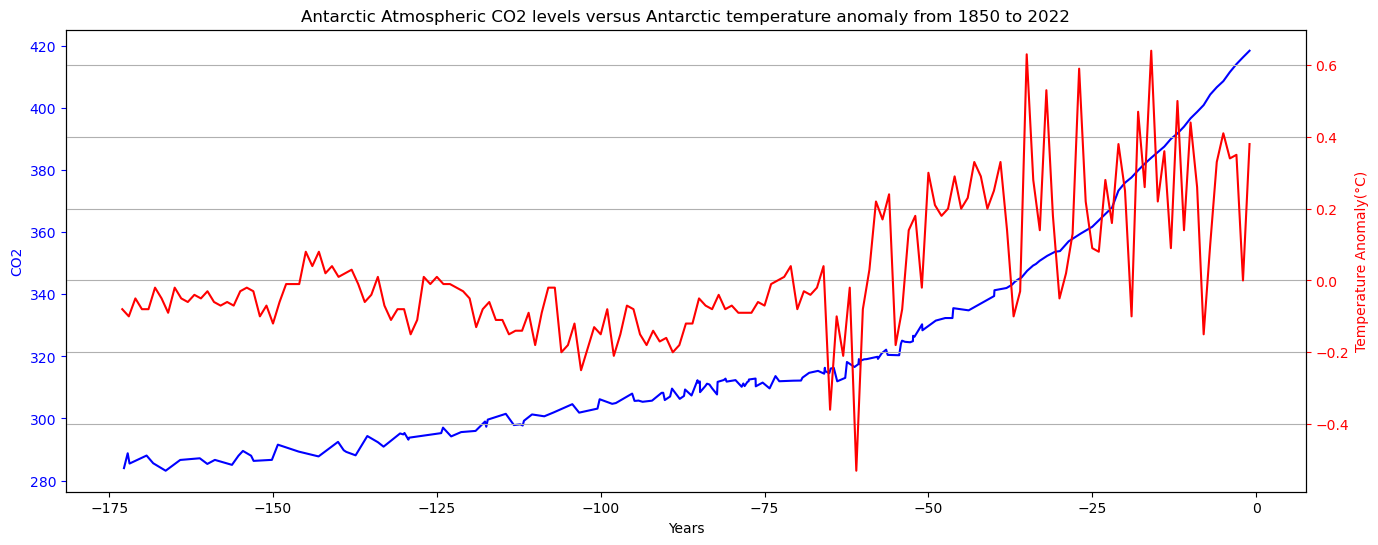

In [309]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CO2 on the primary y-axis
ax1.plot(df_co2_post_1850['Years'], df_co2_post_1850['CO2'], color='blue', label='CO2')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature anomaly on secondary y-axis. 
ax2.plot(df_temp_anomaly_post_1850['Years'], df_antarctic_temp_anomaly_1850['anomaly'], color='red', label='Temperature')
ax2.set_ylabel('Temperature Anomaly(°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CO2 levels versus Antarctic temperature anomaly from 1850 to 2022') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CO2_vs_temp_anomaly')
plt.show()

When we plot these two variables together, we can see that the data can be divided into two sections:

- The data from 1850 to 1950 shows that temperature didn't fluctuate greatly and was typically lower than the average for 1910 to 2000 as a whole. Carbon dioxide levels also didn't increase hugely over this time period relative to the increases which come after that point (levels increased from around 286 ppm to 313 ppm between 1850 and 1950 according to the IPCC data: an increase of around 9.4% over a century)

- The data from 1950 to 2022 shows that temperatures fluctuated a lot more compared to the average for 1910 to 2000 and that for most of the period since around 1965, average temperature at the Antarctic has been higher than this base figure. One interesting point I notice is that the temperature anomaly reached levels of over 0.5 degrees above baseline during four years from 1988 to 2007, but only surpassed 0.4 degrees above baseline twice since 2007; an interesting investigation might be to compare levels of CFCs released into the atmosphere versus the temperature anomaly, as the use of CFCs began to be banned from the late 1980s onwards when it was recognised that they played a huge role destroying the ozone layer and in causing global warming.

A manual investigation of the IPCC dataset shows that it took around **53 years** (from 1912 to 1965) for CO2 levels to go from 300 to 320 ppm. According to the Mauna Loa dataset, it then took only **16 years** to increase to 340 ppm (in 1981), **14 years** to reach 360 ppm (in 1995), **10 years** to reach 380 ppm (in 2005) and **10 years** to reach 400 ppm in 2015. The most recent figures for the year 2022 are 418 ppm.

### CH4 versus Temperature Anomoly ###

Methane is a potent greenhouse gas and the addition of methane into the atmosphere from human economic activity is known to be contributing to atmospheric warming and climate change. According to the International Energy Agency, methane is responsible for around 30% of the  rise in global temperatures since the industrial revolution. 

It has a 'Global Warming Potential' (GWP) 84 times greater than CO2 (the reference gas used for calculating GWP) over a 20-year period, meaning a tonne of methane would absorb as much infrared thermal radiation as 84 tonnes of CO2; therefore, it's release into the atmosphere is 84 times more potent than an equivilant quantity released of CO2 over that timespan. However, methane has a shorter lifespan in the atmosphere than CO2, so its GWP over much longer timespans (eg. centuries) is lower than its GWP over decades. 

By way of comparison with the 20-year GWP value of 84 for methane, the 20-year GWP figures for Dichlorodifluoromethane (a CFC responsible for depletion of the ozone layer) is 10800, which highlights how it important it was that the manufacture of CFCs such as this was banned globally in 2010 (although recent studies have found that some CFCs are still being produced illegally in China).

I can use the composite dataset for atmospheric methane concentrations, which I created earlier, to plot the composite Antarctic temperature anomaly against inferred (for paleo) and recorded (for recent) methane concentrations in the atmosphere:

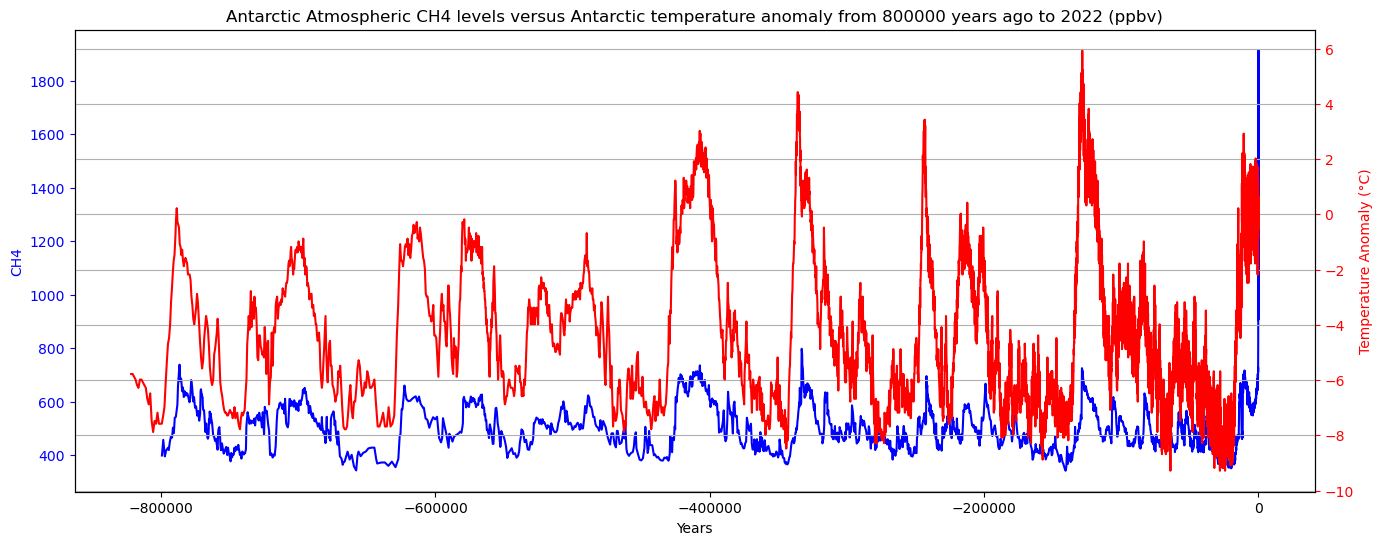

In [310]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CH4 on the primary y-axis
ax1.plot(df_ch4['Years'], df_ch4['CH4'], color='blue', label='CH4')
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature anomaly on secondary y-axis. 
ax2.plot(df_temp_anomaly['Years'], df_temp_anomaly['anomaly'], color='red', label='Temperature anomaly')
ax2.set_ylabel('Temperature Anomaly (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CH4 levels versus Antarctic temperature anomaly from 800000 years ago to 2022 (ppbv)') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CH4_vs_temp_anomaly')
plt.show()

As was the case when I plotted the composite CO2 data against the composite Antarctic temperature anomaly, it seems that local peaks in the data for CH4 are accompanied by local peaks in the data for the temperature anomaly. The most recent large spike in the temperature anomaly data corresponds to the Eemian interglacial, which occured between 115000 and 130000 years ago: during this period, average temperature was around 1 to 2 degrees warmer than today.

I thought it would be interesting to plot the relationship between methane concentrations since 1000 AD with the temperature anomaly over that timespan, to get a closer picture of the relationship during more recent times:

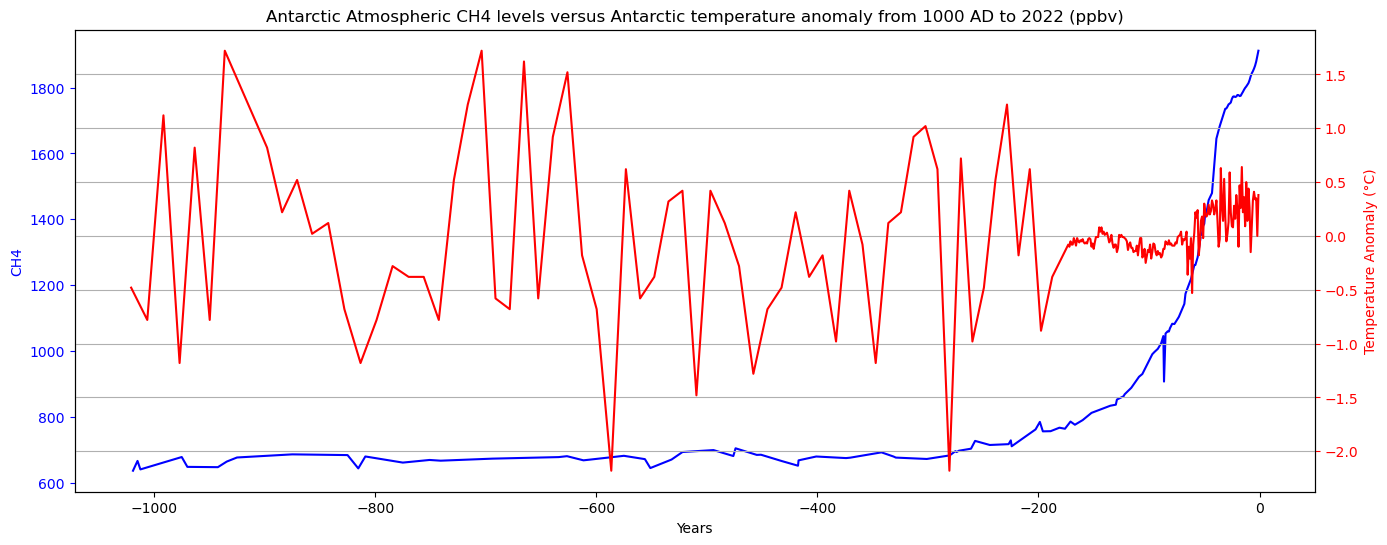

In [311]:
# First I will create a sub-dataframe from the CH4 dataframe containing only data relating to 1000 AD onwards
df_CH4_post_1000 = df_ch4.loc[df_ch4['Years'] >= - 1024]

# Next I will create a sub-dataframe of the anarctic temperature anomoly dataframe containg only data relating to
# 1000 AD onwards
df_temp_anomaly_post_1000 = df_temp_anomaly.loc[df_temp_anomaly['Years'] >= - 1024]

# Next, I will plot them against each other in the same way I did for the full 800000 years:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CH4 on the primary y-axis
ax1.plot(df_CH4_post_1000['Years'], df_CH4_post_1000['CH4'], color='blue', label='CH4')
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature anomaly on secondary y-axis. 
ax2.plot(df_temp_anomaly_post_1000['Years'], df_temp_anomaly_post_1000['anomaly'], color='red', label='Temperature anomaly')
ax2.set_ylabel('Temperature Anomaly (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CH4 levels versus Antarctic temperature anomaly from 1000 AD to 2022 (ppbv)') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CH4_vs_temp_anomaly')
plt.show()


Some points to note from this plot:

- We can see that methane levels in the atmosphere are estimated to have been very steady at just under 700 parts per billion by volume in the atmosphere over the period 1000 AD to 1750 AD. After this time, methane levels began to increase, with the rate of increase accelerating over time. Levels are now over 1900 ppbv, meaning there is now 2.5 times more methane in the atmosphere than there was in the mid 1700s. 

- The temperature anomaly data can clearly be seperated into two sections; the first section corresponds to the sparser data which used the average temperature for 1000 ad to 1845 ad as a baseline. The second section plots the more granular annual temperature anomaly data which uses the period 1910 to 2000 as a baseline. As the period from roughly the 1500s to the early 1800s had lower temperatures than the rest of the millenium (the 'Little Ice Age'), it follows that the the average temperature over the period 1000 AD to 1845 AD was lower than the average temperature for the past century. As a result, temperature anomaly data for the first half of the millenium is more likely to be above 0.5 degrees than the temperature anomaly data for the last century, since it is being measured against a lower base figure.

We can also plot the methane data from 1850 onwards against the temperature anomaly data from 1850 onwards:

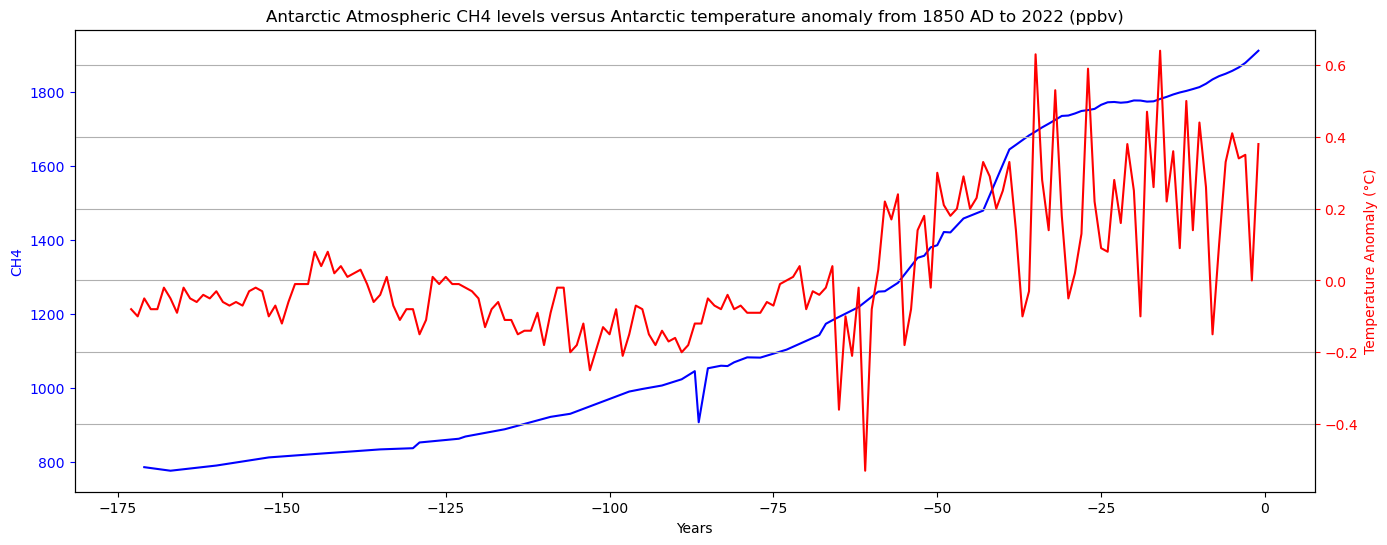

In [312]:
# First I will create a sub-dataframe from the CH4 dataframe containing only data relating to 1850 AD onwards
df_CH4_post_1850 = df_ch4.loc[df_ch4['Years'] >= - 174]

# Next, I will plot them against each other in the same way I did for the full 800000 years:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CH4 on the primary y-axis
ax1.plot(df_CH4_post_1850['Years'], df_CH4_post_1850['CH4'], color='blue', label='CH4')
ax1.set_xlabel('Years')
ax1.set_ylabel('CH4', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature anomaly on secondary y-axis. 
ax2.plot(df_antarctic_temp_anomaly_1850['Years'], df_antarctic_temp_anomaly_1850['anomaly'], color='red', label='Temperature anomaly')
ax2.set_ylabel('Temperature Anomaly (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CH4 levels versus Antarctic temperature anomaly from 1850 AD to 2022 (ppbv)') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CH4_vs_temp_anomaly')
plt.show()

Here we can see that the period of higher temperatures is associated with higher levels of methane in the atmosphere.

#### CH4 versus CO2 ####

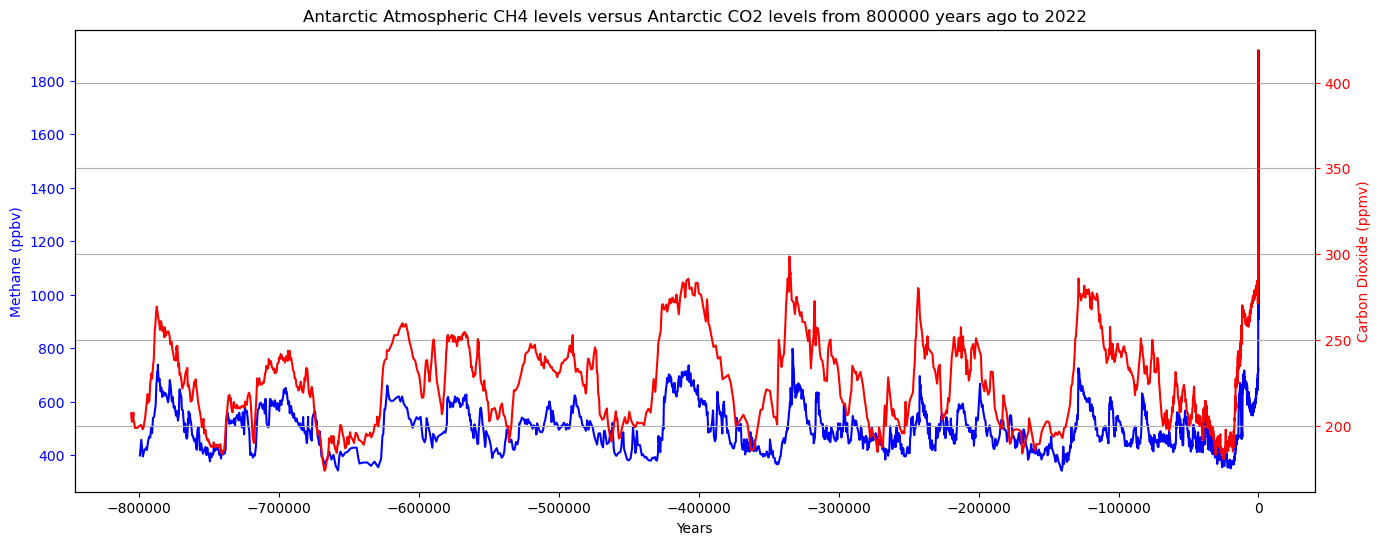

In [313]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CH4 on the primary y-axis
ax1.plot(df_ch4['Years'], df_ch4['CH4'], color='blue', label='CH4')
ax1.set_xlabel('Years')
ax1.set_ylabel('Methane (ppbv)', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for CO2 on secondary y-axis. 
ax2.plot(df_co2['Years'], df_co2['CO2'], color='red', label='CO2')
ax2.set_ylabel('Carbon Dioxide (ppmv)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CH4 levels versus Antarctic CO2 levels from 800000 years ago to 2022') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CH4_vs_CO2')
plt.show()

In [314]:
print(f'the number of rows in the CH4 dataset is {len(df_ch4)}')
print(f'the number of rows in the CO2 dataset is {len(df_co2)}')

the number of rows in the CH4 dataset is 2214
the number of rows in the CO2 dataset is 1922


In [315]:
# to test for correlation between the two datasets, I will take a sample of 1800 rows from each

# df_co2_random = df_co2.sample(n = 1800)
df_ch4_random = df_ch4.sample(n = 1922)

corr_co2_ch4 = np.corrcoef(df_co2['CO2'], df_ch4_random['CH4'])[0,1]

print(f'sample 1 of a correlation coefficient between CO2 and CH4 is {corr_co2_ch4}')

sample 1 of a correlation coefficient between CO2 and CH4 is 0.020584716519847772


### Climate change signals in the Irish context ###

I will now investigate the relationship between global increases in temperature and more local climate conditions. In December 2023, a paper on this topic written by a group of Irish climate scientists appeared in the journal 'Weather and Climate Extremes'; the title of the paper is "The emergence of a climate change signal in long-term Irish meteorological observation". The authors used composite data for temperature and rainfall for the island of Ireland to compare seasonal and annual means and extremes for this data, plus pre-defined climate indices based on the data, against the corresponding data for the base period 1961 to 1990 (which they call Standard Climate Normal, or SCN) on the island of Ireland. They used 14 temperature indices and 5 rainfall indices.

To determine how different modern climate conditions are to the conditions during this based period, they used a "signal to noise ratio"("SNR"), where the 'signal' is the 

They calculated how unusual conditions would be compared to today, with an SNR < 1 meaning 'normal or familiar', SNR > 1 and < 2 meaning 'unusual', SNR > 2 and < 3 meaning 'unfamiliar' and SNR > 3 meaning 'unknown'. 

For my analysis, I am going to take a more straightforward approach. I have obtained reliable monthly data going back to 1950 for one of Met Eireann's primary weather observing stations, Mullingar in Co. Westmeath, and climate average data for the period 1961 to 1990 for this same weather station. The period 1961 to 1990 is commonly used as a "Standard Normal Reference" period in weather analysis to assess long-term climate change, including by Met Éireann.

I have chosen the Mullingar station because it has a full dataset for the time in question, including eleven years of data from before the period of 1961 to 1990. I also know from earlier work in this project that the global temperature anomaly didn't ramp up until around the 1950s - 1960s, so I feel the trade off for not including pre-1940 Irish weather data (which can be difficult to find and can be unreliable) is worth it for the sake of reducing the complexity of seeking the presence of climate change signals in the Irish climate. For the same reason, I have chosen one weather station rather than multiple; I am hoping that by calculating the anomaly against the average of a 30 year reference period, and plotting 73 data points which themselves represent annual averages, some of the variability in the actual weather data over the 73-year period can be smoothed out and the presence or not of a trend linked to wider climate change could be discerned.

I have manually selected the data I want to use from the source file for the 1961 to 1990 average data and saved it as a csv file in my working directory, along with a trimmed version of the csv file containing the monthly weather data for Mullingar from 1950 to 2022. 

I will work out the average annual temperature and annual average total rainfall for each year from 1950 to 2022 and then use the mean annual data for temperature and rainfall for the period 1961 - 1990 to calculate the annual temperature and rain anomaly for each year from 1950 to 2022 file (the source file contained date monthly running until November 2023, but to avoid running into issues if I needed to calculate averages based on twelve months, I decided to leave out 2023). I will plot this anomaly over time, and also alongside the global temperature anomaly for the same period.

Temperatures are in degrees Celsius for the month and rainfall is measured in total millimetres per month. Each month in the dataset is coded from 1 to 12, corresponding to January to December. I have included sources for my data in my references.

Firstly, I will upload and print the figures for mean monthly temperature and total monthly rainfall for each month of the year, calculated for the period 1961 to 1990. 

Then, I will calculate the mean annual temperature for this period based on adding up the twelve figures for mean temp for each month and dividing this sum by twelve ie. finding the mean figure. This figure is like a "mean of means" and I will use this to calculate my temperature anomaly against the 1950 to 2022 data.

For rainfall, I will **sum** the average total rainfall for each of the twelve months to produce a figure for the average **total annual** rainfall amount for a year between 1961 and 1990. I will use this figure to calculate my rainfall anomaly against the 1950 to 2022 data.



*Mean temperature and rainfall 1961 to 1990:*

In [316]:
df_mullingar_means_1961_1990 = pd.read_csv("mullingar_mean_temp_rain_1961_1990_csv.csv")

print(df_mullingar_means_1961_1990)

mean_annual_temp_1961_to_1990 = df_mullingar_means_1961_1990['mean temp'].mean()
round_mean_annual_temp_1961_to_1990 = round(mean_annual_temp_1961_to_1990, 1)

mean_annual_rain_1961_to_1990 = df_mullingar_means_1961_1990['mean total rainfall'].sum()
round_mean_annual_rain_1961_to_1990 = round(mean_annual_rain_1961_to_1990, 1)

print()
print(f'The mean annual temperature at Mullingar for 1961 to 1990 is {round_mean_annual_temp_1961_to_1990} degrees Celsius')
print(f'The mean annual total rainfall at Mullingar for 1961 to 1990 is {round_mean_annual_rain_1961_to_1990} millimetres of rain')


    month  mean temp  mean total rainfall
0       1        4.0                 93.1
1       2        4.2                 66.3
2       3        5.7                 72.3
3       4        7.5                 59.1
4       5       10.1                 72.4
5       6       13.0                 66.2
6       7       14.7                 61.8
7       8       14.2                 81.2
8       9       12.3                 85.9
9      10        9.7                 94.0
10     11        5.9                 88.2
11     12        4.8                 93.8

The mean annual temperature at Mullingar for 1961 to 1990 is 8.8 degrees Celsius
The mean annual total rainfall at Mullingar for 1961 to 1990 is 934.3 millimetres of rain


Next, I will create two new sub-dataframes:

- One containing the mean annual temperature for each year in the source file.
- One containing the mean annual total rainfall for each year in the source file.

I will use the figures obtain above for the 1961 to 1990 periof of 8.8 degrees Celsius for the mean annual temperature and 934.3 mm for the main annual total rainfall to calculate the temperature and rainfall anomalies for each year from 1950 to 2022.

I will then merge the Mullingar temperature and rainfall data for each year into one dataframe and add a column called 'Years' to make it possible to merge this data with other datasets later on.

In [317]:
df_mullingar_monthly_temp_rain = pd.read_csv("mullingar_mean_temp_rain_1950_2022_csv.csv")

# Here I am create a new dataframe with mean annual temperature for each year. The reset_index method ensures the 
# figures for means are added to the datadrame with the same index as the year number associated with it
df_mean_annual_temp_1950_to_2022 = df_mullingar_monthly_temp_rain.groupby('year')['mean_temp'].mean().reset_index()

# Create a new dataframe with annual total rainfall for each year
df_annual_rain_1950_to_2022 = df_mullingar_monthly_temp_rain.groupby('year')['mean_rain'].sum().reset_index()

# Here I have used .loc[:, 'temp_anomaly'] to create a new column which has a value for all the rows which are present
# in the mean annual temperature sub-dataframe. I am using this syntax to avoid getting an warning 
# "A value is trying to be set on a copy of a slice from a DataFrame"
df_mean_annual_temp_1950_to_2022.loc[:, 'temp_anomaly'] = df_mean_annual_temp_1950_to_2022['mean_temp'] - 8.8

# Here I am doing similar to above, but creating a column for the rainfall anomaly instead
df_annual_rain_1950_to_2022.loc[:, 'rain_anomaly'] = df_annual_rain_1950_to_2022['mean_rain'] - 934.3

# now I want to merge these two newly created dataframes into one dataframe, joined by the shared column 'year'ArithmeticError

df_mullingar_weather = pd.merge(df_mean_annual_temp_1950_to_2022, df_annual_rain_1950_to_2022, on = 'year', how ='inner')

# I will also add a column called 'Years' to facillitate merging this dataframe with my other dataframes later on
# on the basis of a shared column
df_mullingar_weather['Years'] = (df_mullingar_weather['year'] - 2023) * 1

print(df_mullingar_weather)
#print(df_mean_annual_temp_1950_to_2022)

#print(df_annual_rain_1950_to_2022)

    year  mean_temp  temp_anomaly  mean_rain  rain_anomaly  Years
0   1950   8.725000     -0.075000      992.9          58.6    -73
1   1951   8.500000     -0.300000     1000.5          66.2    -72
2   1952   8.700000     -0.100000      786.9        -147.4    -71
3   1953   9.500000      0.700000      769.0        -165.3    -70
4   1954   8.716667     -0.083333     1113.1         178.8    -69
..   ...        ...           ...        ...           ...    ...
68  2018   9.458333      0.658333      781.6        -152.7     -5
69  2019   9.541667      0.741667     1090.6         156.3     -4
70  2020   9.566667      0.766667     1078.9         144.6     -3
71  2021   9.866667      1.066667      980.8          46.5     -2
72  2022   9.916667      1.116667     1001.8          67.5     -1

[73 rows x 6 columns]


Now I can plot the temperature and rainfall anomalies over time:

*Temperature anomaly:*

<Axes: title={'center': 'Temperature anomaly (vs 1961 to 1990 average) in degrees Celsius at Mullingar weather station - 1950 to 2022'}, xlabel='year', ylabel='temp_anomaly'>

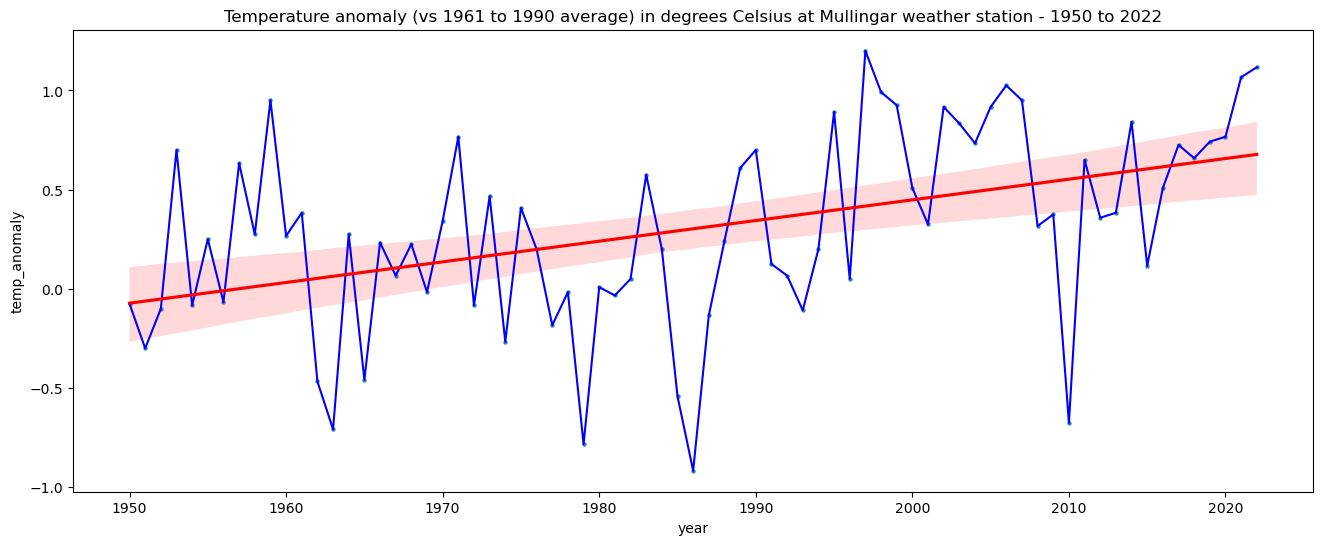

In [318]:
from scipy.stats import linregress 

plt.figure(figsize= (16,6))
plt.title('Temperature anomaly (vs 1961 to 1990 average) in degrees Celsius at Mullingar weather station - 1950 to 2022')

#sns.scatterplot(x ='year', y = 'mean_temp', data = df_mean_annual_temp_1950_to_2022, size = 20)

sns.lineplot(x ='year', y = 'temp_anomaly', data = df_mean_annual_temp_1950_to_2022, color = 'blue')

sns.regplot(x='year', y='temp_anomaly', data=df_mean_annual_temp_1950_to_2022, line_kws={'color': 'red'}, scatter_kws={'s': 5})


*Rainfall anomaly:*

<Axes: title={'center': 'Rainfall anomaly (vs 1961 to 1990 average) in millimetres at Mullingar weather station - 1950 to 2022'}, xlabel='year', ylabel='rain_anomaly'>

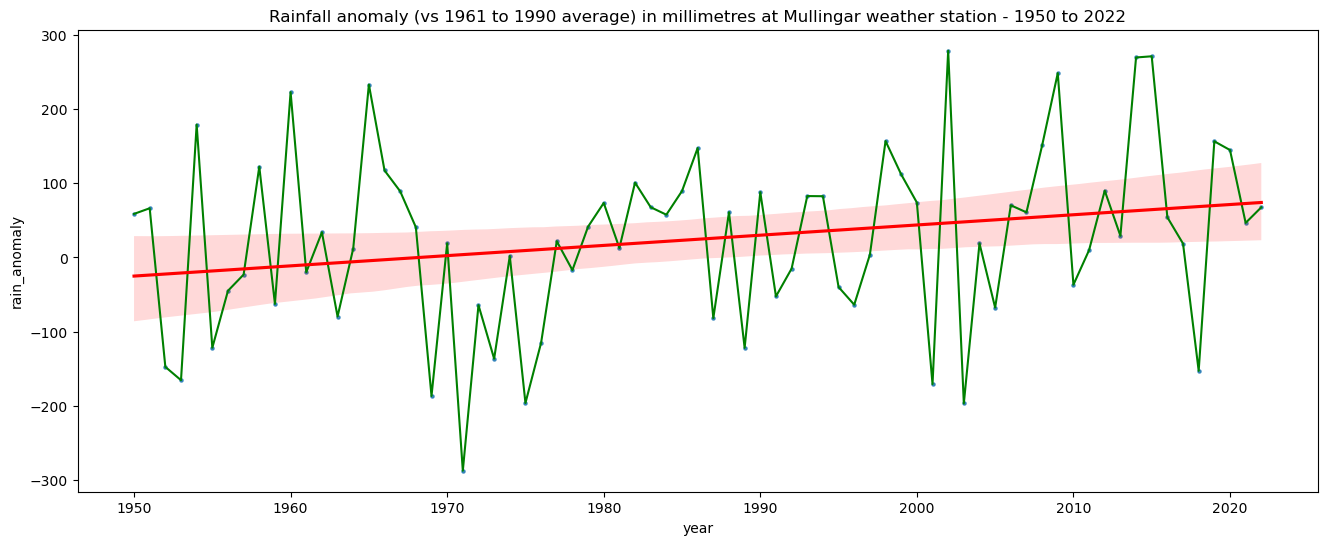

In [319]:
plt.figure(figsize= (16,6))
plt.title('Rainfall anomaly (vs 1961 to 1990 average) in millimetres at Mullingar weather station - 1950 to 2022')

#sns.scatterplot(x ='year', y = 'mean_temp', data = df_mean_annual_temp_1950_to_2022, size = 20)

sns.lineplot(x ='year', y = 'rain_anomaly', data = df_annual_rain_1950_to_2022, color = 'green')

sns.regplot(x='year', y='rain_anomaly', data=df_annual_rain_1950_to_2022, line_kws={'color': 'red'}, scatter_kws={'s': 5})


We can see from the plots above that there is a slight upward trend the in the temperature anomaly and rainfall anomaly for Mullingar weather station between 1950 and 2022. The trend is slightly stronger for the temperature anomaly.

#### Comparing temperature anomaly with global temperature anomaly ####

I will now plot the Mullingar temperature anomaly and the global temperature anomaly on the same a and y-axis, to get a sense of how they compare over the period 1950 to 2022. It should be remembered, however, that the base period used to calculate the Mullingar temperature anomalies is the period 1961 to 1990, while for the global dataset the period 1901 to 2000 is used; since humanity's impact on heating the planet was not as great in the first fifty years of the 20th century compared to the second fifty, I am hopeful that the use of the different base periods between the two samples does not prevent the plots from showing useful information:

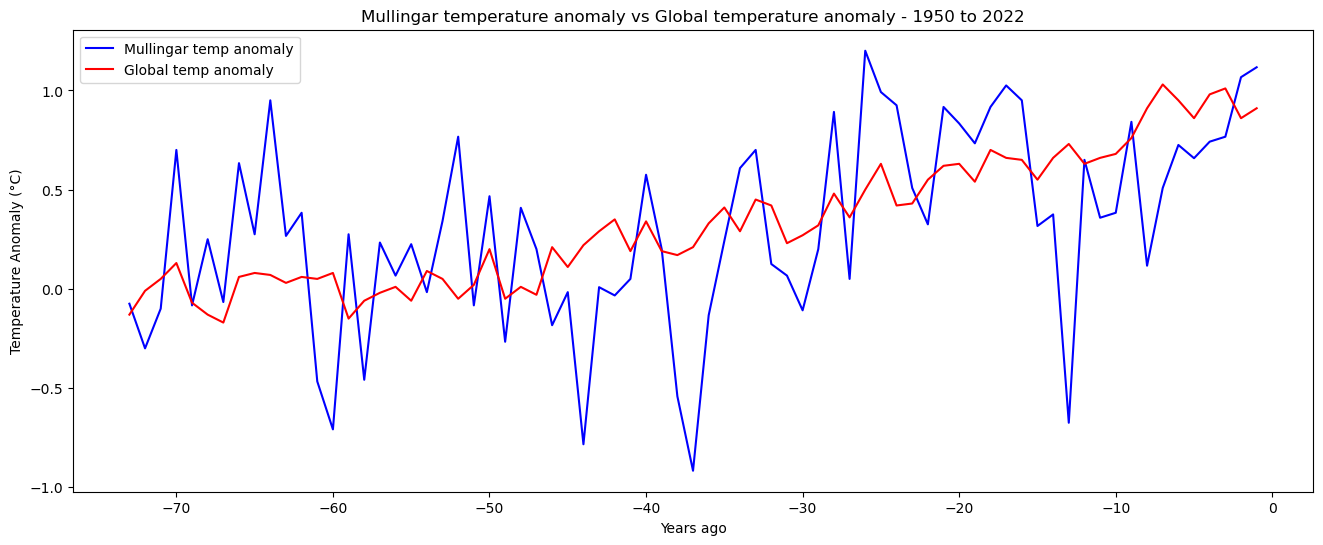

The correlation coefficient between the temperature and rainfall anomalies in Mullingar is 0.5


<Figure size 640x480 with 0 Axes>

In [320]:
# First I will create a sub-dataframe from the global temperature anomaly dataframe containing only data relating to 1950 onwards
df_global_temp_anomaly_post_1950 = df_global_temp_anomaly_1850.loc[df_global_temp_anomaly_1850['Years'] >= - 73]

# Next I will plot the temperature anomaly from this global dataframe and the mullingar dataframe against each other
# plt.figure(figsize= (16,6))

fig, ax1 = plt.subplots(figsize=(16, 6))

sns.lineplot(x='Years', y='temp_anomaly', data=df_mullingar_weather, color = 'blue', label='Mullingar temp anomaly')
sns.lineplot(x='Years', y='anomaly', data=df_global_temp_anomaly_post_1950, color = 'red', label='Global temp anomaly')

plt.title('Mullingar temperature anomaly vs Global temperature anomaly - 1950 to 2022')
plt.xlabel('Years ago')
plt.ylabel('Temperature Anomaly (°C)')

plt.legend()

plt.show()

plt.savefig('mullingar_vs_global_temp_anomaly')

corr_mullingar_global_temp_anomaly = np.corrcoef(df_mullingar_weather['temp_anomaly'], df_global_temp_anomaly_post_1950['anomaly'])[0,1]
round_corr_mullingar_global_temp_anomaly = round(corr_mullingar_global_temp_anomaly, 2)
print(f'The correlation coefficient between the temperature and rainfall anomalies in Mullingar is {round_corr_mullingar_global_temp_anomaly}')

While the data for Mullingar shows greater swings than the Global data, the data seems to have a positive correlation, where the increase in the global temperature anomaly over time occurs during the same time as a rise in the Mullingar temperature anomaly. Indeed, the correlation coefficient between the two sets of data shows a value of 0.5, representing a moderate positive correlation.

#### Comparing temperature and rainfall anomalies ####

I was curious to test if any correlation existed between the rainfall and temperature anomalies, so I will now plot the temperature and rainfall anomalies together on the same x-axis:

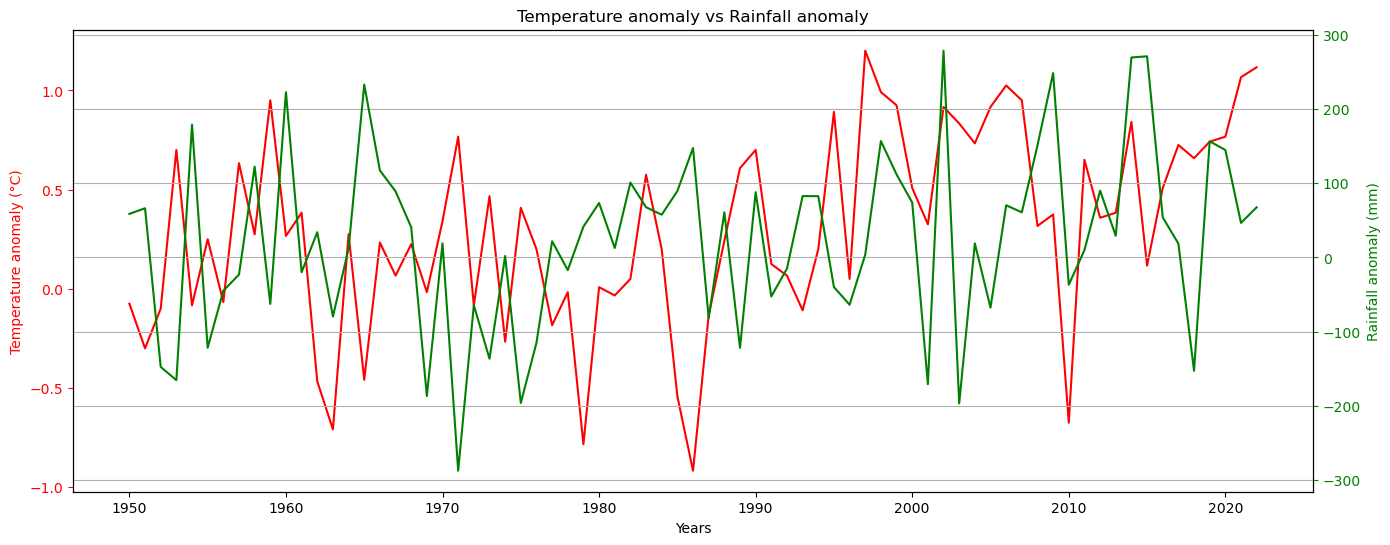

The correlation coefficient between the temperature and rainfall anomalies in Mullingar is -0.02


In [321]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for temperature anomaly on the primary y-axis
ax1.plot(df_mullingar_weather['year'], df_mullingar_weather['temp_anomaly'], color='red', label='Temperature anomaly')
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature anomaly (°C)', color='red')
ax1.tick_params(axis='y', colors='red')   

# Plot for temperature on secondary y-axis
ax2.plot(df_mullingar_weather['year'], df_mullingar_weather['rain_anomaly'], color='green', label='Rainfall anomaly')
ax2.set_ylabel('Rainfall anomaly (mm)', color='green')
ax2.tick_params(axis='y', colors='green')

plt.title('Temperature anomaly vs Rainfall anomaly') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('Mullingar_temp_anomaly_vs_rain_anomaly')
plt.show()

corr_temp_rain_anomaly = np.corrcoef(df_mullingar_weather['temp_anomaly'], df_mullingar_weather['rain_anomaly'])[0,1]
round_corr_temp_rain_anomaly = round(corr_temp_rain_anomaly, 2)
print(f'The correlation coefficient between the temperature and rainfall anomalies in Mullingar is {round_corr_temp_rain_anomaly}')

From looking at the plot, it is difficult to discern any clear relationship between these variables in Mullingar over the timespan examined, and the correlation coefficient of -0.02 confirms an almost complete lack of relationship between the temperature anomaly and rainfall anomaly over time. This is an interesting finding in itself, because I did not have any intuition either way as to how they might be correlated, so it seems they may not be strongly correlated at all (in a local context in any case).

### Fusion of datasets ###

I will now fuse my datasets for CO2, CH4, temperature and rainfall into one composite dataframe, before exporting it to csv and json files. For the Mullingar, Antarctic temperature anomaly and Global temperature anomaly dataframe, I will rename some columns to make it clearer in the composite dataframe what the data represents. I will also change the type of some columns from integers to floats to avoid getting warnings for fusing types in columns. Below are the datasets I will fuse together:

In [333]:
print(df_co2)

          Years     CO2
0    -805741.87  207.29
1    -805205.44  202.23
2    -804595.67  204.86
3    -804082.87  207.50
4    -803998.28  202.92
...         ...     ...
1917      -5.00  408.72
1918      -4.00  411.65
1919      -3.00  414.21
1920      -2.00  416.41
1921      -1.00  418.53

[1922 rows x 2 columns]


In [323]:
print(df_ch4)

         Years      CH4
0    -799469.1   399.30
1    -798490.4   457.80
2    -797350.0   396.10
3    -796392.7   418.00
4    -795011.0   428.30
...        ...      ...
2209      -5.0  1857.33
2210      -4.0  1866.58
2211      -3.0  1878.93
2212      -2.0  1895.28
2213      -1.0  1911.83

[2214 rows x 2 columns]


In [334]:
df_mullingar_weather.rename(columns={'mean_temp': 'mullingar_mean_temp', 'temp_anomaly': 'mullingar_temp_anomaly', 'mean_rain': 'mullingar_mean_rain', 'rain_anomaly': 'mullingar_rain_anomaly', 'Years': 'Years'}, inplace=True) 

# converting integers to floats in 'Years' column to avoid getting warnings for mergings ints and floats
df_mullingar_weather['Years'] = df_mullingar_weather['Years'].astype(float)

# Here I am dropping the unwanted columns CO2_x and CO2_y. the axis = 1 parameter is used to specify that it is a column being
# dropped as opposed to a row
df_mullingar_weather = df_mullingar_weather.drop(['year'], axis = 1)

print(df_mullingar_weather)

    mullingar_mean_temp  mullingar_temp_anomaly  mullingar_mean_rain  \
0              8.725000               -0.075000                992.9   
1              8.500000               -0.300000               1000.5   
2              8.700000               -0.100000                786.9   
3              9.500000                0.700000                769.0   
4              8.716667               -0.083333               1113.1   
..                  ...                     ...                  ...   
68             9.458333                0.658333                781.6   
69             9.541667                0.741667               1090.6   
70             9.566667                0.766667               1078.9   
71             9.866667                1.066667                980.8   
72             9.916667                1.116667               1001.8   

    mullingar_rain_anomaly  Years  
0                     58.6  -73.0  
1                     66.2  -72.0  
2                   -147.4 

In [325]:
df_temp_anomaly.rename(columns={'Years': 'Years', 'anomaly': 'antarctic_temp_anomaly'}, inplace=True) 

print(df_temp_anomaly)

         Years  antarctic_temp_anomaly
0    -821911.0                   -5.78
1    -820842.0                   -5.78
2    -819773.0                   -5.88
3    -818704.0                   -5.98
4    -817635.0                   -6.18
...        ...                     ...
5966      -5.0                    0.41
5967      -4.0                    0.34
5968      -3.0                    0.35
5969      -2.0                    0.00
5970      -1.0                    0.38

[5971 rows x 2 columns]


In [335]:
df_global_temp_anomaly_1850.rename(columns={'anomaly': 'global_temp_anomaly', 'Years': 'Years'}, inplace=True) 

# converting integers to floats in 'Years' column to avoid getting warnings for mergings ints and floats
df_global_temp_anomaly_1850['Years'] = df_global_temp_anomaly_1850['Years'].astype(float)

# Here I am dropping the unwanted columns CO2_x and CO2_y. the axis = 1 parameter is used to specify that it is a column being
# dropped as opposed to a row
df_global_temp_anomaly_1850 = df_global_temp_anomaly_1850.drop(['year'], axis = 1)

print(df_global_temp_anomaly_1850)


     global_temp_anomaly  Years
0                  -0.16 -173.0
1                  -0.08 -172.0
2                  -0.09 -171.0
3                  -0.10 -170.0
4                  -0.10 -169.0
..                   ...    ...
168                 0.86   -5.0
169                 0.98   -4.0
170                 1.01   -3.0
171                 0.86   -2.0
172                 0.91   -1.0

[173 rows x 2 columns]


In [336]:

df_co2_ch4 = pd.merge(df_co2, df_ch4, on = 'Years', how = 'outer')

#print(df_co2_ch4)



df_co2_ch4_mullingar = pd.merge(df_co2_ch4, df_mullingar_weather, on = 'Years', how = 'outer')

df_co2_ch4_mullingar_temp_anomaly = pd.merge(df_co2_ch4_mullingar, df_temp_anomaly, on = 'Years', how = 'outer')

df_merged = pd.merge(df_co2_ch4_mullingar_temp_anomaly, df_global_temp_anomaly_1850, on = 'Years', how = 'outer')

# Here I am creating a new dataframe which is sorted according to the value in the 'Years' column
df_merged_sorted = df_merged.sort_values(by = 'Years')

# reversing the order of the dataset, so that more recent years appear first when the data is exported
df_fused = df_merged_sorted[::-1]

print(df_fused)


         Years     CO2      CH4  mullingar_mean_temp  mullingar_temp_anomaly  \
1921      -1.0  418.53  1911.83             9.916667                1.116667   
1920      -2.0  416.41  1895.28             9.866667                1.066667   
1919      -3.0  414.21  1878.93             9.566667                0.766667   
1918      -4.0  411.65  1866.58             9.541667                0.741667   
1917      -5.0  408.72  1857.33             9.458333                0.658333   
...        ...     ...      ...                  ...                     ...   
4136 -817635.0     NaN      NaN                  NaN                     NaN   
4135 -818704.0     NaN      NaN                  NaN                     NaN   
4134 -819773.0     NaN      NaN                  NaN                     NaN   
4133 -820842.0     NaN      NaN                  NaN                     NaN   
4132 -821911.0     NaN      NaN                  NaN                     NaN   

      mullingar_mean_rain  mullingar_ra

I am happy with the dataframe I have created above and I want to export it now to CSV and JSON files:

Firstly, CSV:

In [337]:
df_fused.to_csv('composite climate data.csv', index=False)

Now, JSON:

### Prediction of Global Temperature Anomaly ###

### Accelerating increases of temperature ###

### Summary ###

### References ###